## Sumit Saha - 16BCE1397
## Large Scale Data Processing (CSE3025)
## J - Component

## Topic: Measuring Baryon Asymmetries using LHCb Collision data

### 1. What is the importance of the (Baryon Asymmetry) Matter-Antimatter Asymmetry problem?

In the very beginning of the Universe, matter and anti-matter were to be found in equal proportions of each other. When particles and its anti-particles come together, they annihilate and leave behind nothing but pure energy. But, this means that matter as we know it shouldn't have existed in the first place. Study of why our Universe does not follow the ideal path where matter and antimatter pop in and out of existense, would enable scientists understand the reason behind matter as we know it.  

This imbalance in Baryonic Matter (Matter) and Anit-Baryonic Matter (Anti-matter) in the observable Universe is known as the Baryon Asymmetry Problem.

In [1]:
from pyspark.sql import SparkSession
from __future__ import print_function
from __future__ import division

%pylab inline
pylab.rcParams['figure.figsize'] = (13.0, 8.0)

spark = SparkSession.builder \
        .appName("LHCb Open Data with Spark") \
        .config("spark.jars.packages", "org.diana-hep:spark-root_2.11:0.1.11") \
        .getOrCreate()

sql = spark.sql

Populating the interactive namespace from numpy and matplotlib


## Datasets

1. Simulation Data: http://opendata.cern.ch/eos/opendata/lhcb/AntimatterMatters2017/data/PhaseSpaceSimulation.root
2. Measurement Data (Baryon 2-Up): http://opendata.cern.ch/eos/opendata/lhcb/AntimatterMatters2017/data/B2HHH_MagnetDown.root
3. Measurement Data (Baryon 2-Down): http://opendata.cern.ch/eos/opendata/lhcb/AntimatterMatters2017/data/B2HHH_MagnetUp.root

### What are ROOT files?

Datasets are compressed into different formats to compliment analyses by reducing disk space. Even though Binary Compressions have been very effective, it has been difficult to work with due to poor machine-independence characteristics. Such issue are handled by the ROOT framework for generating .root files  

In [3]:
data_directory = "/Users/sumitsaha/GHR/spark_project/"

simulation_data = spark.read.format("org.dianahep.sparkroot").load(data_directory + "PhaseSpaceSimulation.root")
simulation_data.createOrReplaceTempView("sim_data") 

simulation_data.cache() # it is a small dataset (~2 MB) so we can afford to cache it
simulation_data.count()

50000

In [8]:
simulation_data.printSchema()

root
 |-- B_FlightDistance: double (nullable = true)
 |-- B_VertexChi2: double (nullable = true)
 |-- H1_PX: double (nullable = true)
 |-- H1_PY: double (nullable = true)
 |-- H1_PZ: double (nullable = true)
 |-- H1_ProbK: double (nullable = true)
 |-- H1_ProbPi: double (nullable = true)
 |-- H1_Charge: integer (nullable = true)
 |-- H1_IPChi2: double (nullable = true)
 |-- H1_isMuon: integer (nullable = true)
 |-- H2_PX: double (nullable = true)
 |-- H2_PY: double (nullable = true)
 |-- H2_PZ: double (nullable = true)
 |-- H2_ProbK: double (nullable = true)
 |-- H2_ProbPi: double (nullable = true)
 |-- H2_Charge: integer (nullable = true)
 |-- H2_IPChi2: double (nullable = true)
 |-- H2_isMuon: integer (nullable = true)
 |-- H3_PX: double (nullable = true)
 |-- H3_PY: double (nullable = true)
 |-- H3_PZ: double (nullable = true)
 |-- H3_ProbK: double (nullable = true)
 |-- H3_ProbPi: double (nullable = true)
 |-- H3_Charge: integer (nullable = true)
 |-- H3_IPChi2: double (nullable = 

In [4]:
simulation_data.limit(10).toPandas()

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,...,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon
0,0.0,1.0,3551.84,1636.96,23904.14,1.0,0.0,-1,1.0,0,...,1.0,0,36100.40,16546.83,295600.61,1.0,0.0,-1,1.0,0
1,0.0,1.0,-2525.98,-5284.05,35822.00,1.0,0.0,1,1.0,0,...,1.0,0,-8648.32,-16617.56,98535.13,1.0,0.0,-1,1.0,0
2,0.0,1.0,-700.67,1299.73,8127.76,1.0,0.0,-1,1.0,0,...,1.0,0,-13483.34,10860.77,79787.59,1.0,0.0,1,1.0,0
3,0.0,1.0,3364.63,1397.30,222815.29,1.0,0.0,1,1.0,0,...,1.0,0,1925.16,-551.12,40420.96,1.0,0.0,1,1.0,0
4,0.0,1.0,-581.66,-1305.24,22249.59,1.0,0.0,-1,1.0,0,...,1.0,0,-2820.04,-8305.43,250130.00,1.0,0.0,-1,1.0,0
5,0.0,1.0,112.84,-13297.98,51882.87,1.0,0.0,1,1.0,0,...,1.0,0,-440.95,-13699.42,71163.14,1.0,0.0,-1,1.0,0
6,0.0,1.0,5558.97,3913.52,56981.08,1.0,0.0,-1,1.0,0,...,1.0,0,3457.70,780.13,28716.94,1.0,0.0,1,1.0,0
7,0.0,1.0,-15208.03,-1783.93,265210.55,1.0,0.0,1,1.0,0,...,1.0,0,-4478.67,-164.39,71498.09,1.0,0.0,1,1.0,0
8,0.0,1.0,-109.04,8239.25,191486.94,1.0,0.0,-1,1.0,0,...,1.0,0,-2083.59,11359.35,192297.67,1.0,0.0,-1,1.0,0
9,0.0,1.0,15175.26,93142.09,379269.30,1.0,0.0,1,1.0,0,...,1.0,0,3295.84,24950.02,105990.48,1.0,0.0,-1,1.0,0


Text(0,0.5,'Count')

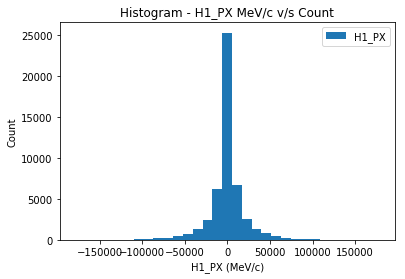

In [8]:
h1px_data = simulation_data.select('H1_PX').toPandas()
h1px_data.plot.hist(bins=31, range=[h1px_data.min().iloc[0], h1px_data.max().iloc[0]], \
                    title="Histogram - H1_PX MeV/c v/s Count")
xlabel("H1_PX (MeV/c)")
ylabel("Count")

In [43]:
h1px_data.max()

H1_PX    178396.84
dtype: float64

In [44]:
h1px_data.min()

H1_PX   -179037.39
dtype: float64

Text(0,0.5,'Count')

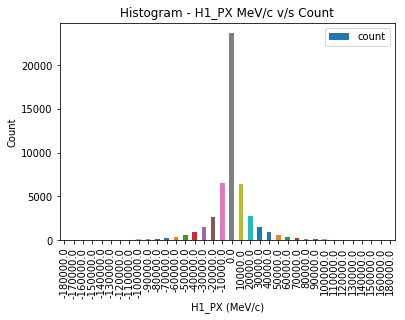

In [18]:
H1_PX_SQL = sql("select round(H1_PX/10000,0)*10000 as bin, count(1) as count \
                 from sim_data \
                 group by round(H1_PX/10000,0) order by 1")
H1_PX_Pandas = H1_PX_SQL.toPandas()
H1_PX_Pandas.head()
H1_PX_Pandas.plot.bar(x='bin',y='count',title="Histogram - H1_PX MeV/c v/s Count")
xlabel("H1_PX (MeV/c)")
ylabel("Count")

In [16]:
p_mag = sql("""select H1_PX, H1_PY, H1_PZ, round(sqrt(H1_PX*H1_PX+H1_PY*H1_PY+H1_PZ*H1_PZ),2) as H1_MAG
               from sim_data 
               where H1_ProbK = 1.0""")
p_mag.show(5)

+--------+--------+---------+---------+
|   H1_PX|   H1_PY|    H1_PZ|   H1_MAG|
+--------+--------+---------+---------+
| 3551.84| 1636.96| 23904.14| 24221.96|
|-2525.98|-5284.05|  35822.0| 36297.62|
| -700.67| 1299.73|  8127.76|  8260.79|
| 3364.63|  1397.3|222815.29|222845.07|
| -581.66|-1305.24| 22249.59| 22295.43|
+--------+--------+---------+---------+
only showing top 5 rows



Text(0,0.5,'Count')

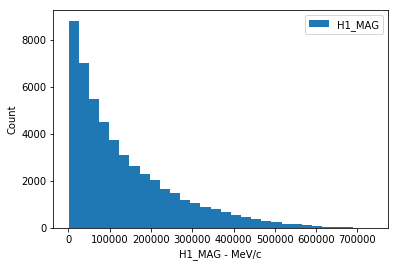

In [17]:
p_tot = p_mag.select('H1_MAG').toPandas()
p_tot.plot.hist(bins=30)
xlabel("H1_MAG - MeV/c")
ylabel("Count")

Text(0,0.5,'Count')

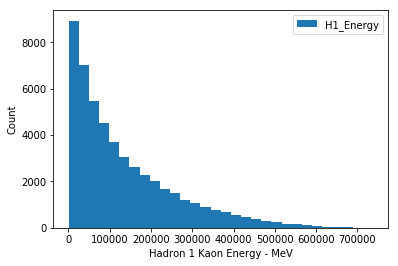

In [10]:
kcharged_mass = 493.677 # Invariant Mass of Kaon 
H1_energy = sql("""
                select round(sqrt({0} + H1_PX*H1_PX + H1_PY*H1_PY + H1_PZ*H1_PZ),2) as H1_Energy
                from sim_data
                where H1_ProbK = 1.0
                """.format(kcharged_mass*kcharged_mass))
H1_energy_Pandas = H1_energy.toPandas()
H1_energy_Pandas.head()

H1_energy_Pandas.plot.hist(bins=30)
xlabel("Hadron 1 Kaon Energy - MeV")
ylabel("Count")

Text(0,0.5,'Count')

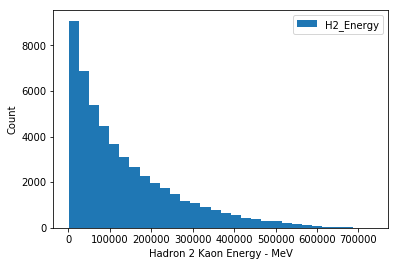

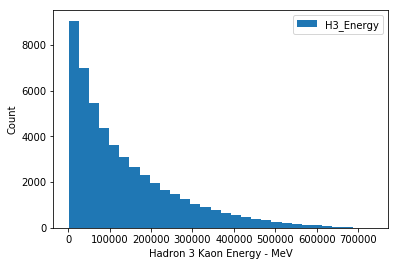

In [11]:
H2_energy = sql("""
                select round(sqrt({0} + H2_PX*H2_PX + H2_PY*H2_PY + H2_PZ*H2_PZ),2) as H2_Energy
                from sim_data
                where H2_ProbK = 1.0
                """.format(kcharged_mass*kcharged_mass))
H2_energy_Pandas = H2_energy.toPandas()
H2_energy_Pandas.head()

H2_energy_Pandas.plot.hist(bins=30)
xlabel("Hadron 2 Kaon Energy - MeV")
ylabel("Count")

H3_energy = sql("""
                select round(sqrt({0} + H3_PX*H3_PX + H3_PY*H3_PY + H3_PZ*H3_PZ),2) as H3_Energy
                from sim_data
                where H3_ProbK = 1.0
                """.format(kcharged_mass*kcharged_mass))
H3_energy_Pandas = H3_energy.toPandas()
H3_energy_Pandas.head()

H3_energy_Pandas.plot.hist(bins=30)
xlabel("Hadron 3 Kaon Energy - MeV")
ylabel("Count")

In [12]:
b_meson_4momentum = sum_kaons_energy = sql("""
  select 
    sqrt({0} + H1_PX*H1_PX + H1_PY*H1_PY + H1_PZ*H1_PZ)  +
    sqrt({0} + H2_PX*H2_PX + H2_PY*H2_PY + H2_PZ*H2_PZ)  +
    sqrt({0} + H3_PX*H3_PX + H3_PY*H3_PY + H3_PZ*H3_PZ)  as Tot_Energy,
    H1_PX + H2_PX + H3_PX as PX_Tot,
    H1_PY + H2_PY + H3_PY as PY_Tot,
    H1_PZ + H2_PZ + H3_PZ as PZ_Tot
  from sim_data
  where H1_ProbK = 1.0 and H2_ProbK = 1.0 and H3_ProbK = 1.0""".format(kcharged_mass*kcharged_mass))

b_meson_4momentum.show(5)

+------------------+------------------+------------------+------------------+
|        Tot_Energy|            PX_Tot|            PY_Tot|            PZ_Tot|
+------------------+------------------+------------------+------------------+
| 657116.5757740112| 81159.39000000001|34164.380000000005|         651168.39|
| 731372.0511105937|-54357.21000000001|        -118454.64| 719646.4400000001|
|106495.84886114487|          -15596.0|15711.460000000001|         104035.62|
| 425265.3012500729|           7482.21|           2216.05|425161.00000000006|
|  338761.408158081|          -2248.65|         -11608.84|         338513.81|
+------------------+------------------+------------------+------------------+
only showing top 5 rows



In [13]:
b_meson_invariant_mass = b_meson_4momentum.selectExpr("""
   sqrt(Tot_Energy* Tot_Energy - (PX_Tot*PX_Tot + PY_Tot*PY_Tot + PZ_Tot*PZ_Tot) ) as invariant_mass""")
   
b_meson_invariant_mass.show(5)

+------------------+
|    invariant_mass|
+------------------+
| 5279.259021223659|
|5279.2541641354055|
| 5279.242799854169|
| 5273.156761236732|
| 5279.252178269909|
+------------------+
only showing top 5 rows



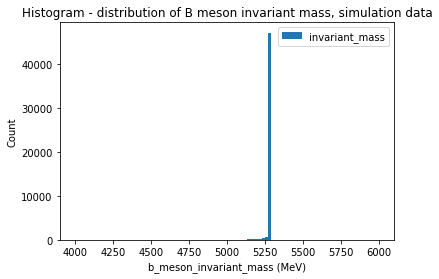

In [14]:
b_meson_invariant_mass.toPandas().plot.hist(bins=101, range=[4000, 6000],
title="Histogram - distribution of B meson invariant mass, simulation data") 
xlabel('b_meson_invariant_mass (MeV)')
ylabel('Count');